# Regressão Softmax com dados do MNIST utilizando gradiente descendente estocástico por minibatches

O objetivo deste notebook é ilustrar
- o uso do gradiente estocástico por mini-batchs
- utilizando as classes Dataset e DataLoater.

A apresentação da perda nos gráficos é um pouco diferente da usual, mostrando a perda de cada um dos vários minibatches dentro de cada época, de forma que as épocas são apresentadas com valores fracionários.

## Importação das bibliotecas

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch.autograd import Variable
from torch.utils.data import DataLoader

import torchvision
from torchvision.datasets import MNIST

## Dataset e dataloader

### Definição do tamanho do minibatch

In [2]:
batch_size = 100

### Carregamento, criação dataset e do dataloader

In [3]:
dataset_dir = 'MNIST/'

dataset_train = MNIST(dataset_dir, train=True, download=True,
                      transform=torchvision.transforms.ToTensor())

loader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)

print('Número de minibatches de trenamento:', len(loader_train))

x_train, y_train = next(iter(loader_train))
print("\nDimensões dos dados de um minibatch:", x_train.size())
print("Valores mínimo e máximo dos pixels: ", torch.min(x_train), torch.max(x_train))
print("Tipo dos dados das imagens:         ", type(x_train))
print("Tipo das classes das imagens:       ", type(y_train))

100%|██████████| 9.91M/9.91M [00:00<00:00, 59.4MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 5.56MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 14.6MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 7.50MB/s]

Número de minibatches de trenamento: 600

Dimensões dos dados de um minibatch: torch.Size([100, 1, 28, 28])
Valores mínimo e máximo dos pixels:  tensor(0.) tensor(1.)
Tipo dos dados das imagens:          <class 'torch.Tensor'>
Tipo das classes das imagens:        <class 'torch.Tensor'>


### Usando todas as amostras do MNIST

Neste exemplo utilizaremos todas as amostras de treinamento.

In [4]:
print('Número de minibatches de trenamento:', len(loader_train))
n_batches_train = len(loader_train)
total_samples = dataset_train.train_data.size(0)

Número de minibatches de trenamento: 600


/usr/local/lib/python3.12/dist-packages/torchvision/datasets/mnist.py:76: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


## Modelo

In [5]:
model = torch.nn.Linear(28*28, 10)

In [6]:
x = torch.ones(28*28).reshape(1, 784)
print(x.shape)
predict = model(x)
predict

torch.Size([1, 784])


tensor([[-0.0859,  0.3731,  1.2016, -0.2729, -0.0170,  0.4470, -0.2378,  0.0030,
          0.0433, -0.9440]], grad_fn=<AddmmBackward0>)

## Treinamento

### Inicialização dos parâmetros

In [7]:
n_epochs = 5
learningRate = 0.5

# Utilizaremos CrossEntropyLoss como função de perda
criterion = torch.nn.CrossEntropyLoss()

# Gradiente descendente
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

### Laço de treinamento dos parâmetros

In [8]:
epochs = []
losses = []

total_trained_samples = 0
for i in range(n_epochs):
    for k,(x_train, y_train) in enumerate(loader_train):
        # Transforma a entrada para uma dimensão
        inputs = Variable(x_train.view(-1, 28 * 28))
        # predict da rede
        outputs = model(inputs)

        # calcula a perda
        loss = criterion(outputs, Variable(y_train))

        # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_trained_samples += x_train.size(0)
        epochs.append(total_trained_samples / total_samples)
        losses.append(loss.data)

In [9]:
print('Final loss:', loss.data)

Final loss: tensor(0.2407)


### Visualizando gráfico de perda durante o treinamento

Text(0.5, 0, 'época')

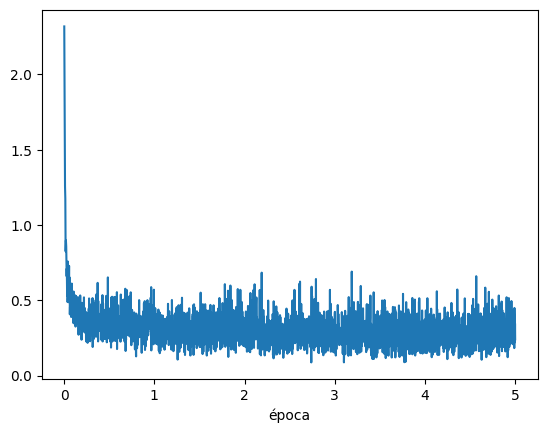

In [10]:
plt.plot(epochs, losses)
plt.xlabel('época')

### Visualização usual da perda, somente no final de cada minibatch

Text(0.5, 0, 'época')

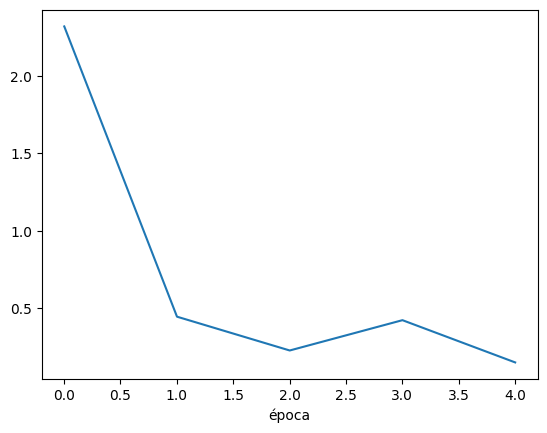

In [11]:
plt.plot(epochs[:5 * n_batches_train +1:n_batches_train], losses[:5 * n_batches_train+1:n_batches_train])
plt.xlabel('época')

# Atividades

## Perguntas

1. Qual é o tamanho do mini-batch? Foi definido anteriormente (batch_size = 100) e usado para criar o loader_train.

2. Em uma época, quantos mini-batches existem?
O dataset MNIST de treino tem 60.000 amostras. O cálculo é: 60.000 (amostras totais)/100 (tamanho do batch)=600 batches (lotes) ou apenas pegando o valor de len(loader_train)

3. Qual é a definição de época?
No contexto deste notebook uma época termina após o loop interno ter processado todos os 600 mini-batches, cobrindo assim todas as 60.000 imagens de treino.

## Exercícios


1. Coloque um print no final de cada minibatch, no mesmo estilo do print do final de época, no seguinte estilo:
    - Época: 1/4, batch: 600
2. Altere o tamanho de minibatch (batch_size) algumas vezes, refaça o treinamento, e compare no gráfico abaixo a queda da perda para cada tamanho de minibatch.

In [12]:
#1
epochs = []
losses = []

total_trained_samples = 0
for i in range(n_epochs):
    # k é o índice do mini-batch (de 0 a 599)
    for k,(x_train, y_train) in enumerate(loader_train):
        # Transforma a entrada para uma dimensão
        inputs = Variable(x_train.view(-1, 28 * 28))
        # predict da rede
        outputs = model(inputs)

        # calcula a perda
        loss = criterion(outputs, Variable(y_train))

        # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_trained_samples += x_train.size(0)
        epochs.append(total_trained_samples / total_samples)
        losses.append(loss.data.item()) # .item() é preferível a .data


        if (k + 1) % n_batches_train == 0:
            print(f'Época: {i+1}/{n_epochs}, batch: {k+1}/{n_batches_train}, loss: {loss.data.item():.6f}')

Época: 1/5, batch: 600/600, loss: 0.309513
Época: 2/5, batch: 600/600, loss: 0.446251
Época: 3/5, batch: 600/600, loss: 0.242937
Época: 4/5, batch: 600/600, loss: 0.276172
Época: 5/5, batch: 600/600, loss: 0.184197


Total de amostras de treino: 60000

--- INICIANDO TREINAMENTO (Batch Size = 100) ---
Época: 1/5, batch: 600/600, loss: 0.434412
Época: 2/5, batch: 600/600, loss: 0.224395
Época: 3/5, batch: 600/600, loss: 0.226858
Época: 4/5, batch: 600/600, loss: 0.224906
Época: 5/5, batch: 600/600, loss: 0.455995
--- Treinamento com Batch Size = 100 concluído ---

--- INICIANDO TREINAMENTO (Batch Size = 1000) ---
Época: 1/5, batch: 60/60, loss: 0.434721
Época: 2/5, batch: 60/60, loss: 0.411751
Época: 3/5, batch: 60/60, loss: 0.352935
Época: 4/5, batch: 60/60, loss: 0.304525
Época: 5/5, batch: 60/60, loss: 0.337549
--- Treinamento com Batch Size = 1000 concluído ---

--- INICIANDO TREINAMENTO (Batch Size = 60000) ---
Época: 1/5, batch: 1/1, loss: 2.318578
Época: 2/5, batch: 1/1, loss: 1.840408
Época: 3/5, batch: 1/1, loss: 1.515984
Época: 4/5, batch: 1/1, loss: 1.301093
Época: 5/5, batch: 1/1, loss: 1.152986
--- Treinamento com Batch Size = 60000 concluído ---

--- PLOTANDO COMPARAÇÃO ---


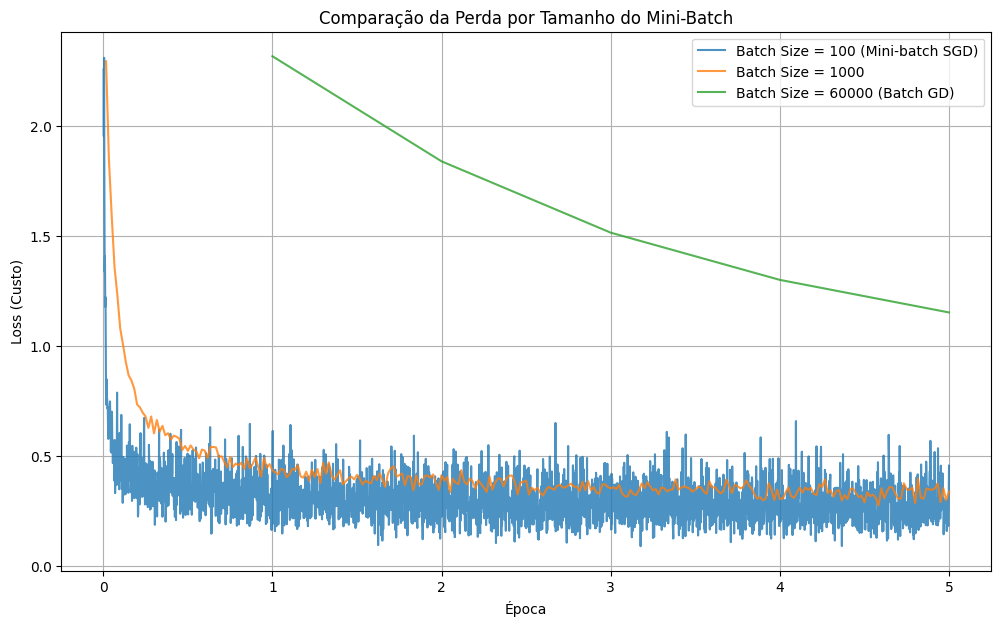

In [13]:
#2
batch_sizes_to_test = [100, 1000, 60000] # Batch sizes para testar
n_epochs = 5
learningRate = 0.5


all_epochs = {}
all_losses = {}


dataset_dir = 'MNIST/'
dataset_train = MNIST(dataset_dir, train=True, download=True,
                      transform=torchvision.transforms.ToTensor())
total_samples = dataset_train.data.size(0) # Correção: usar .data para MNIST dataset

print(f"Total de amostras de treino: {total_samples}\n")


for bs in batch_sizes_to_test:
    print(f"--- INICIANDO TREINAMENTO (Batch Size = {bs}) ---")

    model = torch.nn.Linear(28*28, 10)
    criterion = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

    loader_train = DataLoader(dataset_train, batch_size=bs, shuffle=True)
    n_batches_train = len(loader_train)

    # Listas locais para esta execução
    epochs = []
    losses = []
    total_trained_samples = 0

    # Loop de treinamento (copiado da célula 22)
    for i in range(n_epochs):
        for k, (x_train, y_train) in enumerate(loader_train):
            # Transforma a entrada para uma dimensão
            inputs = x_train.view(-1, 28 * 28) # Sintaxe moderna (sem Variable)
            # predict da rede
            outputs = model(inputs)

            # calcula a perda
            loss = criterion(outputs, y_train) # Sintaxe moderna (sem Variable)

            # zero, backpropagation, ajusta parâmetros
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            total_trained_samples += x_train.size(0)
            epochs.append(total_trained_samples / total_samples)
            losses.append(loss.item()) # .item() é a forma moderna de .data

        # Print no final de cada época
        print(f'Época: {i+1}/{n_epochs}, batch: {k+1}/{n_batches_train}, loss: {loss.item():.6f}')

    # Armazena os resultados desta execução
    all_epochs[bs] = epochs
    all_losses[bs] = losses
    print(f"--- Treinamento com Batch Size = {bs} concluído ---\n")

print("--- PLOTANDO COMPARAÇÃO ---")
plt.figure(figsize=(12, 7))

for bs in batch_sizes_to_test:
    # Define o rótulo com base no tamanho do batch
    label = f'Batch Size = {bs}'
    if bs == 100:
        label += ' (Mini-batch SGD)'
    elif bs == total_samples:
        label += ' (Batch GD)'

    plt.plot(all_epochs[bs], all_losses[bs], label=label, alpha=0.8)

plt.xlabel('Época')
plt.ylabel('Loss (Custo)')
plt.title('Comparação da Perda por Tamanho do Mini-Batch')
plt.legend()
plt.grid(True)
plt.show()

## Conclusões sobre os experimentos deste notebook
